In [116]:
import random
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
def print_chars(flat_array, num_of_row=7):
  for i in range(0, len(flat_array), num_of_row):
    print(flat_array[i : i + num_of_row])

In [142]:
def generate_Es():
  E1 = np.zeros(9*7)
  E1[::7] = E1[56:] = E1[:7] = E1[28:33] = 1

  E2 = np.zeros(9*7)
  E2[:7] = E2[56:] = E2[29:32] = E2[24] = E2[38] = E2[1::7] =  1

  E3 = np.zeros(9*7)
  E3[:7] = E3[56:] = E3[29:33] = E3[25] = E3[39] = E3[1::7] =  1
  
  return np.asarray([E1, E2, E3])

In [141]:
def generate_Ks():
  K1 = np.zeros(9*7)
  K1[::7] = K1[5] = K1[11] = K1[17] = K1[23] = K1[29] = K1[37] = K1[45] = K1[53] = K1[61] = 1

  K2 = np.zeros(9*7)
  K2[1::7] = K2[0] = K2[2] = K2[5] = K2[6] = K2[11] = K2[17] = K2[23] = K2[30] = K2[38] = K2[46] = K2[54] = K2[61] = K2[62] = K2[56] = K2[58] = 1

  K3 = np.zeros(9*7)
  K3[1::7] = K3[0] = K3[2] = K3[5] = K3[6] = K3[12] = K3[18] = K3[24] = K3[30] = K3[38] = K3[46] = K3[54] = K3[61] = K3[62] = K3[56] = K3[58] = 1

  return np.asarray([K1, K2, K3])

In [140]:
def generate_As():
  A1 = np.zeros(9*7)
  A1[3] = A1[10] = A1[17] = A1[23] = A1[25] = A1[30] = A1[32] = A1[36:41] = A1[43] = A1[47] = A1[50] = A1[54] = A1[56:59] = A1[60:] = 1

  A2 = np.zeros(9*7)
  A2[3] = A2[10] = A2[16] = A2[18] = A2[23] = A2[25] = A2[29] = A2[33] = A2[36:41] = A2[42] = A2[48] = A2[49] = A2[55] = A2[56] = A2[62] = 1

  A3 = np.zeros(9*7)
  A3[3] = A3[10] = A3[17] = A3[23] = A3[25] = A3[30] = A3[32] = A3[36] = A3[40] = A3[43:48] = A3[50] = A3[54] = A3[57] = A3[61] = 1
  
  return np.asarray([A1, A2, A3])

In [139]:
def generate_Bs():
  B1 = np.zeros(9*7)
  B1[1::7] = B1[:6] = B1[56:62] = B1[29:34] = B1[13:28:7] = B1[41:56:7] = 1

  B2 = np.zeros(9*7)
  B2[::7] = B2[:6] = B2[56:62] = B2[29:34] = B2[13:28:7] = B2[41:56:7] = 1

  B3 = np.zeros(9*7)
  B3[1::7] = B3[:6] = B3[56:62] = B3[22:27] = B3[13:21:7] = B3[34:56:7] = 1

  return np.asarray([B1, B2, B3])

In [138]:
def generate_Js():
  J1 = np.zeros(9*7)
  J1[5:55:7] = J1[3:7] = J1[58:61] = J1[43:51:7] = 1

  J2 = np.zeros(9*7)
  J2[5:55:7] = J2[58:61] = J2[43:51:7] = 1

  J3 = np.zeros(9*7)
  J3[5:55:7] = J3[4:7] = J3[58:61] = J3[50] = 1

  return np.asarray([J1, J2, J3])

In [137]:
def generate_Cs():
  C1 = np.zeros(9*7)
  C1[2:7] = C1[14:43:7] = C1[8] = C1[13] = C1[50] = C1[55] = C1[58:] = 1

  C2 = np.zeros(9*7)
  C2[2:5] = C2[14:43:7] = C2[8] = C2[12] = C2[20] = C2[50] = C2[48] = C2[54] = C2[58:61] = 1

  C3 = np.zeros(9*7)
  C3[2:5] = C3[14:43:7] = C3[8] = C3[12] = C3[6:21:7] = C3[50] = C3[48] = C3[54] = C3[58:61] = 1

  return np.asarray([C1, C2, C3])

In [143]:
data_set = {}
data_set["E"] = generate_Es()
data_set["A"] = generate_As()
data_set["K"] = generate_Ks()
data_set["B"] = generate_Bs()
data_set["J"] = generate_Js()
data_set["C"] = generate_Cs()

In [237]:
def find_min_nouron(W, training_data):
  d = np.sqrt(np.square(W - training_data).sum(axis=2))
  # https://numpy.org/doc/stable/reference/generated/numpy.argmin.html
  return np.unravel_index(np.argmin(d, axis=None), d.shape)


In [288]:
def update_weights(W, sample, lr, radius, winer_idx, neighbor_distance):
  #we update the winer nouron only if radius is very small 
  x, y = winer_idx
  if radius < 1e-3:
    W[x,y] += lr * (sample - W[x,y])
    return W
  for i in range(max(0, x-neighbor_distance), min(W.shape[0], x+neighbor_distance)):
    for j in range(max(0, y-neighbor_distance), min(W.shape[1], y+neighbor_distance)):
      dist_sq = np.square(i - x) + np.square(j - y)
      dist_func = np.exp(-dist_sq / 2 * np.square(radius))
      W[i,j,:] += lr * dist_func * (sample - W[i,j,:])
  return W


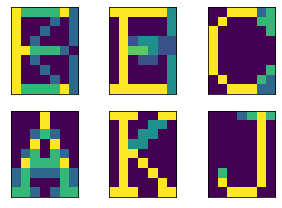

In [306]:
# Dimensions kohonen map since we have 6 class to be classified
m = 2
n = 3

# hyper parameters
epochs = 2000
lr = 0.3
lr_decay = 0.01
radius = 2
radius_decay = 0.1
neighbor_distance = 2

# Initialize the wieghts randomly
W = np.random.uniform(0, 10, (m , n, 9*7)).astype(float)

training_data = np.asarray([x for x in data_set.values()]).reshape(18, 63)
_lr = lr
_radius = radius
for i in np.arange(0, epochs):
  np.random.shuffle(training_data)
  for t_data in training_data:
    min_nouron_idx = find_min_nouron(W, t_data.reshape(1, 63))
    W = update_weights(W, t_data, lr, radius, min_nouron_idx, neighbor_distance)
  lr = _lr * np.exp(-i * lr_decay)
  radius = _radius * np.exp(-i * radius_decay)

fig, ax = plt.subplots(nrows=m, ncols=n, figsize=(5, 3.5),subplot_kw=dict(xticks=[], yticks=[]))

ax[0][0].imshow(W[0,0].reshape(9,7))
ax[0][1].imshow(W[0,1].reshape(9,7))
ax[0][2].imshow(W[0,2].reshape(9,7))
ax[1][0].imshow(W[1,0].reshape(9,7))
ax[1][1].imshow(W[1,1].reshape(9,7))
ax[1][2].imshow(W[1,2].reshape(9,7))

In [314]:
D1 = np.zeros(9*7)
D1[::7] = D1[12] = D1[1:5] = D1[20:49:7] = D1[57:61] = D1[54] = 1

D2 = np.zeros(9*7)
D2[1::7] = D2[12] = D2[0:5] = D2[20:49:7] = D2[56:61] = D2[54] = 1

d1_detection = find_min_nouron(W, D1.reshape(1, 63))

d2_detection = find_min_nouron(W, D2.reshape(1, 63))

print(d1_detection)

print(d2_detection)

(0, 0)
(0, 1)
